# Modeling data with least-squares fits

### Exponential model

**(a)** Fit the world population of passenger automobiles to the model $y = c_1 e^{c_2 (t-t_0)}$ by linearizing and doing a least-squares fit for $c_1, c_2$. The number of cars here is given in millions, e.g. there were 53.1 million cars in 1950.

\begin{array}{c|r}
year & cars\\
\hline
1950 & 53.1 \\
1960 & 98.3 \\
1970 & 193.5 \\
1980 & 320.3 \\
1990 & 444.9 \\
2000 & 548.6 \\
2010 & 723.6 
\end{array}


In [17]:
tdata = [ 1950, 1960, 1970, 1980, 1990, 2000, 2010]

7-element Array{Int64,1}:
 1950
 1960
 1970
 1980
 1990
 2000
 2010

In [18]:
ydata = [53.1, 98.3, 193.5, 320.0, 444.9, 548.6, 723.6]

7-element Array{Float64,1}:
  53.1
  98.3
 193.5
 320.0
 444.9
 548.6
 723.6

In [12]:
length(tdata)

7

In [19]:
A = ones(7,2)
A[:,2] = tdata - t₀
b = log.(ydata)
x = A\b
c1 = exp(x[1])
c2 = x[2]

0.043240887870938105

In [14]:
c1

67.67164564705911

**(b)** Write a Julia function $f(t) = c_1 e^{c_2 t}$ with the numerical values of $c_1, c_2$ and make a plot with the datapoints as dots and the model as a smooth curve.


In [20]:
t₀ = 1950
f(t) = c1 * exp.(c2*(t - t₀))

f (generic function with 1 method)

In [21]:
using Plots
scatter(tdata,ydata, marker=:circ, color="blue", label="data")

t = linspace(1930, 2015)
plot!(t, f(t), linestyle=:solid, color="red", label="exponential model")
plot!(xlabel="year", ylabel="# of cars")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1940 
 
 
 1960 
 
 
 1980 
 
 
 2000 
 
 
 0 
 
 
 250 
 
 
 500 
 
 
 750 
 
 
 1000 
 
 
 year 
 
 
 # of cars 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 data 
 
 
 
 exponential model

**(c)** What does the model predict for the worldwide number of cars for 2016? Compare to the actual 2016 value of 1.2 billion cars. 

In [22]:
f(2016)

1174.4624918147329

## Power-law model

**(a)** Fit the height and weight data for males ages 2-11 to a power-law model $w = c_1 h^{c_2}$. The data is from the  Centers for Disease Control.

\begin{array}{r|l|l}
\text{age (yrs)} & \text{h (m)} & \text{w (kg)} \\
2 & 0.91 & 13.7 \\
3 & 0.99 & 15.9 \\
4 & 1.06 & 18.5 \\
5 & 1.13 & 21.3 \\
6 & 1.19 & 23.5 \\
7 & 1.26 & 27.2 \\
8 & 1.32 & 32.7 \\
9 & 1.38 & 36.0 \\
10 & 1.41 & 38.6 \\
11 & 1.49 & 43.7 
\end{array}



**(b)** What weight does the model predict for a 2-meter tall man? What is that in pounds?

### t e^t  model

**(a)** Bloodstream concentration of a drug after hypodermic injection follows the model $y = c_1 t \, e^{c_2 t}$, where $y$ is the drug concentration. Fit the following data to the model, and plot the data and model for $0 \leq t \leq 24$ with dots and curves, respectively.

\begin{array}{r|l}
\text{t (hrs)} & \text{concentration (ng/ml)} \\
\hline
1 & 08.0 \\
2 & 12.3 \\
3 & 15.5 \\
4 & 16.8 \\
5 & 17.1 \\
6 & 15.8 \\
7 & 15.2 \\
8 & 14.0 
\end{array}

In [35]:
X = readdlm("blood.asc")
tdata = X[:,1]
ydata = X[:,2]
A = ones(8,2)
A[:,2] = tdata
b = log(ydata./tdata)
x = A\b
c1 = exp(x[1])
c2 = x[2]

-0.2151367864153562

In [36]:
c1, c2

(9.790159861321683,-0.2151367864153562)

In [37]:
f(t) = c1*t.*exp(c2*t)

f (generic function with 1 method)

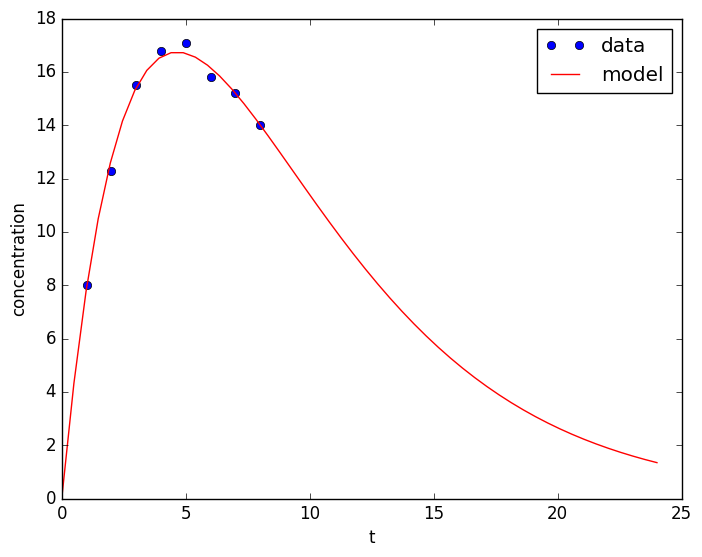

PyObject <matplotlib.legend.Legend object at 0x7f416613bf10>

In [39]:
plot(tdata, ydata, "bo")
t = linspace(0,24)
plot(t,f(t), "r-")
xlabel("t")
ylabel("concentration")
legend(("data", "model"))

**(b)** What is the expected concentration after 12 hours? 18 hrs? 24 hrs?

In [40]:
f(12), f(18), f(24)

(8.887475142812818,3.6666828137512537,1.3446701506576548)